In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import torchvision.transforms as transforms

import os
import shutil
import random

In [2]:
folder = os.path.dirname(os.path.dirname(os.getcwd()))
folder

'C:\\Users\\samko\\Desktop\\Files\\UNI\\DP'

In [91]:
copiedImages = r''+folder+r'\Data\ImagesCroppedCopy'
copiedLables = r''+folder+r'\Data\LabelsCroppedCopy'
labelsFolder = r''+folder+r'\Data\LabelsCropped'

In [92]:
file_image_list = os.listdir(copiedImages)

In [93]:
for file_name in file_image_list:
    src_label_path = os.path.join(labelsFolder, file_name.replace("jpg", "mat"))
    dst_label_path = os.path.join(copiedLables, file_name.replace("jpg", "mat"))
    
    shutil.copy(src_label_path, dst_label_path)

In [94]:
file_labels_list = os.listdir(copiedLables)

In [97]:
len(file_image_list)

621

In [95]:
last = int(file_image_list[-1].strip('.jpg'))
last

751

In [98]:
directory_path_labels = r''+folder+r'\Data\LabelsCroppedCopy'
targer_dir_path_labels = r''+folder+r'\Data\LabelsCroppedAugmented'
filenames_labels = os.listdir(directory_path_labels)

In [99]:
directory_path_images = r''+folder+r'\Data\ImagesCroppedCopy'
targer_dir_path_images = r''+folder+r'\Data\ImagesCroppedAugmented'
filenames_images = os.listdir(directory_path_images)

In [100]:
def check_index(index, targer_dir_path_images, targer_dir_path_labels):
    if index<10:
        img_string = '000' + str(index) + '.jpg'
        lbl_string = '000' + str(index) + '.mat'
        dst_image_path = os.path.join(targer_dir_path_images, img_string)
        dst_label_path = os.path.join(targer_dir_path_labels, lbl_string)
    if index>=10 and index <100:
        img_string = '00' + str(index) + '.jpg'
        lbl_string = '00' + str(index) + '.mat'
        dst_image_path = os.path.join(targer_dir_path_images, img_string)
        dst_label_path = os.path.join(targer_dir_path_labels, lbl_string)
    if index>=100 and index < 1000:
        img_string = '0' + str(index) + '.jpg'
        lbl_string = '0' + str(index) + '.mat'
        dst_image_path = os.path.join(targer_dir_path_images, img_string)
        dst_label_path = os.path.join(targer_dir_path_labels, lbl_string)
    if index >= 1000:
        img_string = str(index) + '.jpg'
        lbl_string = str(index) + '.mat'
        dst_image_path = os.path.join(targer_dir_path_images, img_string)
        dst_label_path = os.path.join(targer_dir_path_labels, lbl_string)
    return dst_image_path, dst_label_path

In [101]:
index = 1
for file_image in file_image_list:
    image = Image.open(os.path.join(directory_path_images, file_image))
    label = loadmat(os.path.join(directory_path_labels, file_image.replace("jpg", "mat"))).get('mask')
    label = Image.fromarray(label)
    
    image_rotate = image.rotate(90)
    label_rotate = label.rotate(90)
    label_rotate = np.array(label_rotate)
    
    image_flip_lr = image.transpose(Image.FLIP_LEFT_RIGHT)
    label_flip_lr = label.transpose(Image.FLIP_LEFT_RIGHT)
    label_flip_lr = np.array(label_flip_lr)
    
    image_flip_td = image.transpose(Image.FLIP_TOP_BOTTOM)
    label_flip_td = label.transpose(Image.FLIP_TOP_BOTTOM)
    label_flip_td = np.array(label_flip_td)

    label = np.array(label)

    dst_image_path, dst_label_path = check_index(index, targer_dir_path_images, targer_dir_path_labels)
    image.save(dst_image_path)
    savemat(dst_label_path, {'mask': label})
    index +=1

    dst_image_path, dst_label_path = check_index(index, targer_dir_path_images, targer_dir_path_labels)
    image_rotate.save(dst_image_path)
    savemat(dst_label_path, {'mask': label_rotate})
    index +=1

    dst_image_path, dst_label_path = check_index(index, targer_dir_path_images, targer_dir_path_labels)
    image_flip_lr.save(dst_image_path)
    savemat(dst_label_path, {'mask': label_flip_lr})
    index +=1

    dst_image_path, dst_label_path = check_index(index, targer_dir_path_images, targer_dir_path_labels)
    image_flip_td.save(dst_image_path)
    savemat(dst_label_path, {'mask': label_flip_td})
    index +=1

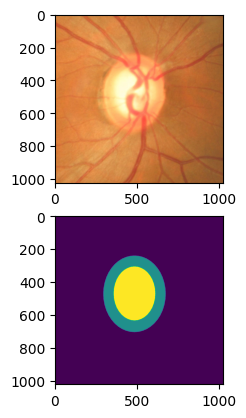

In [72]:
plt.subplot(2,1,1)
plt.imshow(image)
plt.subplot(2,1,2)
plt.imshow(label)

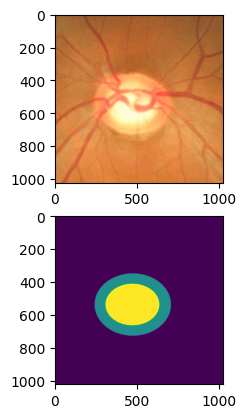

In [73]:
plt.subplot(2,1,1)
plt.imshow(image_rotate)
plt.subplot(2,1,2)
plt.imshow(label_rotate)

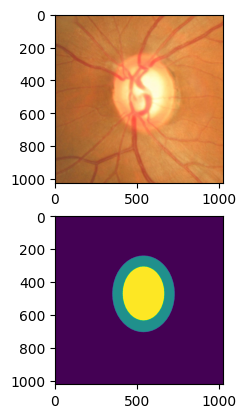

In [74]:
plt.subplot(2,1,1)
plt.imshow(image_flip_lr)
plt.subplot(2,1,2)
plt.imshow(label_flip_lr)

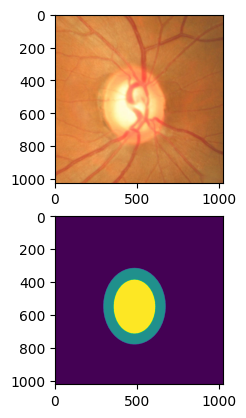

In [75]:
plt.subplot(2,1,1)
plt.imshow(image_flip_td)
plt.subplot(2,1,2)
plt.imshow(label_flip_td)